# Basics of the Principal Component Analysis

In this notebook, we are going to walk through a principal component analysis of a sample dataset. Let's first take a look at our data

In [1]:
# IMPORTS
import matplotlib.pyplot as plt
import numpy as np

### Step 1: Take a look at the data

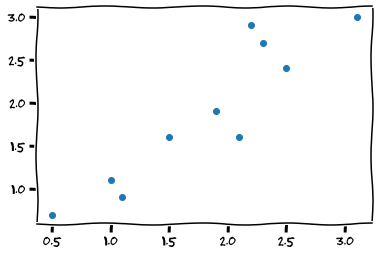

In [2]:
# Define datasets -- I took this from a lovely PCA review that can be found here: http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf
X = [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.1, 1, 1.5, 1.1]
Y = [2.4, 0.7, 2.9, 1.9, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]
# Let's see what this looks like
with plt.xkcd():
    plt.scatter(X, Y)
    plt.show()

### Step 2/3:  Calculate the Mean and Covariance
We are going to use the numpy covariance function to do all of this for us!

In [3]:
x_mean = np.mean(X)
X_adj = [x-x_mean for x in X]
y_mean = np.mean(Y)
Y_adj = [y - y_mean for y in Y]

In [4]:
cov = np.cov(X_adj, Y_adj)
print(cov)

[[0.62177778 0.60933333]
 [0.60933333 0.70622222]]


## Step 4/5: Calculate and sort Eigenvalues
Again we are going to be using a numpy function!

In [5]:
lam, v = np.linalg.eig(cov)
print("Eigenvalues:")
print(lam)
print("Eigenvectors:")
print(v)

Eigenvalues:
[0.05320558 1.27479442]
Eigenvectors:
[[-0.7311384  -0.68222917]
 [ 0.68222917 -0.7311384 ]]


/home/carterrhea/anaconda3/envs/astro/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


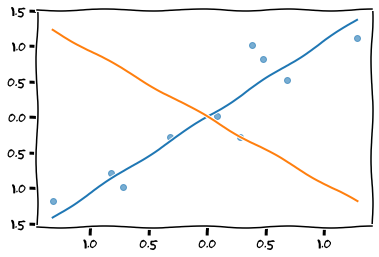

In [6]:
x_s = np.linspace(np.min(X_adj), np.max(X_adj), 10)
with plt.xkcd():
    plt.scatter(X_adj, Y_adj, label='Data', alpha=0.6)
    plt.plot(x_s, v[0][0]/v[0][1]*x_s, label='eigen 2')
    plt.plot(x_s, v[1][0]/v[1][1]*x_s, label='eigen 1')

### Step 6: Create Transormation Matrix

In [7]:
W = np.vstack((v[:,1], v[:,0])).T   # Switch order to sort by eigenvalue
print("Transformation Matrix")
W

Transformation Matrix


array([[-0.68222917, -0.7311384 ],
       [-0.7311384 ,  0.68222917]])

Now Let's transform our data and see how it looks in the new space!

In [8]:
new = np.dot(W.T,np.vstack((X_adj, Y_adj)))
new.T

array([[-0.8441078 , -0.14241495],
       [ 1.76328582,  0.16007228],
       [-1.00500825,  0.41804116],
       [-0.0692011 , -0.04484649],
       [-1.69212834, -0.17176049],
       [-0.92700349,  0.20848148],
       [ 0.01369459, -0.39574292],
       [ 1.12971587,  0.06739474],
       [ 0.42303209,  0.04294012],
       [ 1.20772064, -0.14216493]])

/home/carterrhea/anaconda3/envs/astro/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


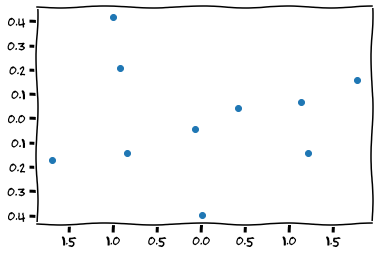

In [9]:
with plt.xkcd():
    plt.scatter(new[0,:], new[1,:])